# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, Callback
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.regularizers import l2

# **Load Dataset**

In [2]:
df = pd.read_csv("penyakitkulit.csv")
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10
0,Chicken pox,skin_rash,fatigue,lethargy,high_fever,headache,loss_of_appetite,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body
1,Chicken pox,itching,fatigue,lethargy,high_fever,headache,loss_of_appetite,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body
2,Chicken pox,itching,skin_rash,fatigue,high_fever,headache,loss_of_appetite,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body
3,Chicken pox,itching,skin_rash,fatigue,lethargy,headache,loss_of_appetite,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body
4,Chicken pox,itching,skin_rash,fatigue,lethargy,high_fever,headache,loss_of_appetite,mild_fever,malaise,red_spots_over_body
5,Chicken pox,itching,skin_rash,fatigue,lethargy,high_fever,headache,loss_of_appetite,mild_fever,swelled_lymph_nodes,malaise
6,Chicken pox,itching,skin_rash,fatigue,lethargy,high_fever,headache,loss_of_appetite,swelled_lymph_nodes,malaise,red_spots_over_body
7,Chicken pox,itching,skin_rash,fatigue,lethargy,high_fever,headache,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body
8,Chicken pox,itching,skin_rash,fatigue,lethargy,high_fever,loss_of_appetite,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body
9,Chicken pox,itching,skin_rash,lethargy,high_fever,headache,loss_of_appetite,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     28 non-null     object
 1   Symptom_1   28 non-null     object
 2   Symptom_2   28 non-null     object
 3   Symptom_3   28 non-null     object
 4   Symptom_4   24 non-null     object
 5   Symptom_5   18 non-null     object
 6   Symptom_6   11 non-null     object
 7   Symptom_7   10 non-null     object
 8   Symptom_8   10 non-null     object
 9   Symptom_9   10 non-null     object
 10  Symptom_10  10 non-null     object
dtypes: object(11)
memory usage: 2.5+ KB


In [4]:
# Mengecek Duplikat
df.duplicated().sum()

np.int64(0)

In [5]:
# Mengecek Missing Value
df.isnull().sum()

,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,4
Symptom_5,10
Symptom_6,17
Symptom_7,18
Symptom_8,18
Symptom_9,18


In [6]:
# Mengisi nilai NaN dengan 'none'
df.fillna("none", inplace=True)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10
0,Chicken pox,skin_rash,fatigue,lethargy,high_fever,headache,loss_of_appetite,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body
1,Chicken pox,itching,fatigue,lethargy,high_fever,headache,loss_of_appetite,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body
2,Chicken pox,itching,skin_rash,fatigue,high_fever,headache,loss_of_appetite,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body
3,Chicken pox,itching,skin_rash,fatigue,lethargy,headache,loss_of_appetite,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body
4,Chicken pox,itching,skin_rash,fatigue,lethargy,high_fever,headache,loss_of_appetite,mild_fever,malaise,red_spots_over_body


In [7]:
# Mengambil semua gejala unik dari setiap kolom (kecuali kolom pertama) pada df
# lalu menghapus nilai "none" dan mengonversinya menjadi list dan menampilkannya
all_symptoms = set()
for col in df.columns[1:]:
    all_symptoms.update(df[col].unique())
all_symptoms.discard("none")
all_symptoms = list(all_symptoms)
all_symptoms

[' silver_like_dusting',
 ' blister',
 ' swelled_lymph_nodes',
 ' small_dents_in_nails',
 ' malaise',
 ' red_sore_around_nose',
 ' lethargy',
 ' loss_of_appetite',
 ' yellow_crust_ooze',
 ' dischromic _patches',
 ' mild_fever',
 ' skin_rash',
 'itching',
 ' skin_peeling',
 ' joint_pain',
 ' nodal_skin_eruptions',
 ' high_fever',
 ' fatigue',
 ' headache',
 ' inflammatory_nails',
 ' red_spots_over_body']

In [8]:
# Membersihkan spasi pada awal kalimat gejala pada DataFrame
# lalu mengumpulkan semua gejala unik (kecuali 'none') dari semua kolom kecuali kolom pertama dan menampilkannya
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
all_symptoms = set()
for col in df.columns[1:]:
    all_symptoms.update(df[col].unique())
all_symptoms.discard("none")
all_symptoms = list(all_symptoms)
all_symptoms

<ipython-input-8-3256869457>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


['lethargy',
 'joint_pain',
 'loss_of_appetite',
 'headache',
 'swelled_lymph_nodes',
 'inflammatory_nails',
 'skin_peeling',
 'blister',
 'skin_rash',
 'itching',
 'small_dents_in_nails',
 'silver_like_dusting',
 'yellow_crust_ooze',
 'high_fever',
 'nodal_skin_eruptions',
 'fatigue',
 'red_spots_over_body',
 'dischromic _patches',
 'red_sore_around_nose',
 'malaise',
 'mild_fever']

In [9]:
# Mengurutkan gejala sesuai dengan abjad
all_symptoms = sorted(all_symptoms)
all_symptoms

['blister',
 'dischromic _patches',
 'fatigue',
 'headache',
 'high_fever',
 'inflammatory_nails',
 'itching',
 'joint_pain',
 'lethargy',
 'loss_of_appetite',
 'malaise',
 'mild_fever',
 'nodal_skin_eruptions',
 'red_sore_around_nose',
 'red_spots_over_body',
 'silver_like_dusting',
 'skin_peeling',
 'skin_rash',
 'small_dents_in_nails',
 'swelled_lymph_nodes',
 'yellow_crust_ooze']

In [10]:
jumlah_symptoms = len(all_symptoms)
print(f"Jumlah gejala unik: {jumlah_symptoms}")

Jumlah gejala unik: 21


In [11]:
def augment_data(df, num_augmented_samples=100):
    augmented_data = []
    diseases = df["Disease"].unique()
    for disease in diseases:
        disease_rows = df[df["Disease"] == disease]
        disease_symptoms = set()
        for _, row in disease_rows.iterrows():
            for col in df.columns[1:]:
                if row[col] != "none":
                    disease_symptoms.add(row[col])
        disease_symptoms = list(disease_symptoms - {"none"})
        for _ in range(num_augmented_samples):
            num_symptoms = random.randint(1, min(len(disease_symptoms), 16))
            selected_symptoms = random.sample(disease_symptoms, num_symptoms)
            new_row = {"Disease": disease}
            for i in range(1, 17):
                new_row[f"Symptom_{i}"] = "none"
            for i, symptom in enumerate(selected_symptoms, 1):
                if i <= 16:
                    new_row[f"Symptom_{i}"] = symptom
            augmented_data.append(new_row)
    return pd.DataFrame(augmented_data)

# Augmentasi dataset
df_augmented = augment_data(df, num_augmented_samples=100)
df_combined = pd.concat([df, df_augmented], ignore_index=True)
df_combined.fillna("none", inplace=True)

In [12]:
# Fungsi untuk mengubah gejala di setiap baris menjadi vektor biner berdasarkan daftar gejala unik
def symptoms_to_vector(row):
    symptom_vector = [0] * len(all_symptoms)
    for col in df.columns[1:]:
        symptom = row[col]
        if symptom != "none" and symptom in all_symptoms:
            symptom_vector[all_symptoms.index(symptom)] = 1
    return symptom_vector

symptom_vectors = df_combined.apply(symptoms_to_vector, axis=1, result_type="expand")
symptom_vectors.columns = all_symptoms

In [13]:
# Encode label
le = LabelEncoder()
df_combined["Disease"] = le.fit_transform(df_combined["Disease"])
df_encoded = pd.concat([df_combined["Disease"], symptom_vectors], axis=1)

In [14]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Disease               428 non-null    int64
 1   blister               428 non-null    int64
 2   dischromic _patches   428 non-null    int64
 3   fatigue               428 non-null    int64
 4   headache              428 non-null    int64
 5   high_fever            428 non-null    int64
 6   inflammatory_nails    428 non-null    int64
 7   itching               428 non-null    int64
 8   joint_pain            428 non-null    int64
 9   lethargy              428 non-null    int64
 10  loss_of_appetite      428 non-null    int64
 11  malaise               428 non-null    int64
 12  mild_fever            428 non-null    int64
 13  nodal_skin_eruptions  428 non-null    int64
 14  red_sore_around_nose  428 non-null    int64
 15  red_spots_over_body   428 non-null    int64
 16  silver_l

In [15]:
df_encoded.head()

,Disease,blister,dischromic _patches,fatigue,headache,high_fever,inflammatory_nails,itching,joint_pain,lethargy,...,mild_fever,nodal_skin_eruptions,red_sore_around_nose,red_spots_over_body,silver_like_dusting,skin_peeling,skin_rash,small_dents_in_nails,swelled_lymph_nodes,yellow_crust_ooze
0,0,0,0,1,1,1,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0
1,0,0,0,1,1,1,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
2,0,0,0,1,1,1,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
3,0,0,0,1,1,0,0,1,0,1,...,1,0,0,1,0,0,1,0,1,0
4,0,0,0,1,1,1,0,1,0,1,...,1,0,0,1,0,0,1,0,0,0


In [16]:
df_encoded['Disease'].value_counts()

,count
Disease,
0,110
3,107
2,106
1,105


In [17]:
# Split data
X = df_encoded.drop("Disease", axis=1)
y = df_encoded["Disease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
# Membangun model Sequential
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(len(le.classes_), activation='softmax')
])

# Mengkompilasi model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,052 (54.89 KB)

 Trainable params: 13,668 (53.39 KB)

 Non-trainable params: 384 (1.50 KB)

In [19]:
# Membuat callback untuk menghentikan pelatihan jika val_loss mencapai 0.1
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               min_delta=0.0001,
                               restore_best_weights=True)
# Menambahkan ReduceLROnPlateau untuk menyesuaikan learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=7, min_lr=0.0001)

# Callback kustom: hentikan jika akurasi dan val_akurasi > 95%
class EarlyStopAt95(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') is not None and logs.get('val_accuracy') is not None:
            if logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95:
                print("\nAccuracy dan Val Accuracy > 95%, menghentikan pelatihan.")
                self.model.stop_training = True

early_stop_at_95 = EarlyStopAt95()

# Melatih model
history = model.fit(X_train, y_train,
                    epochs=75,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr, early_stop_at_95])

Epoch 1/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.1581 - loss: 2.0404 - val_accuracy: 0.1739 - val_loss: 1.3838 - learning_rate: 5.0000e-04
Epoch 2/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3068 - loss: 1.5971 - val_accuracy: 0.4058 - val_loss: 1.3278 - learning_rate: 5.0000e-04
Epoch 3/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4106 - loss: 1.2659 - val_accuracy: 0.5797 - val_loss: 1.2721 - learning_rate: 5.0000e-04
Epoch 4/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5454 - loss: 1.0651 - val_accuracy: 0.7101 - val_loss: 1.2151 - learning_rate: 5.0000e-04
Epoch 5/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6458 - loss: 0.8499 - val_accuracy: 0.7826 - val_loss: 1.1572 - learning_rate: 5.0000e-04
Epoch 6/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6666 - loss: 0.8097 - val_accuracy: 0.7971 - val_loss: 1.1012 - learning_rate: 5.0000e-04
Epoch 7/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7785 - loss: 0.6492

In [20]:
# Evaluasi Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9494 - loss: 0.2376
Test Loss: 0.23580700159072876
Test Accuracy: 0.9534883499145508


In [21]:
# Prediksi pada data uji dan laporan klasifikasi
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

Classification Report:
                  precision    recall  f1-score   support

     Chicken pox       1.00      0.91      0.95        22
Fungal infection       0.91      1.00      0.95        21
        Impetigo       1.00      0.90      0.95        21
       Psoriasis       0.92      1.00      0.96        22

        accuracy                           0.95        86
       macro avg       0.96      0.95      0.95        86
    weighted avg       0.96      0.95      0.95        86



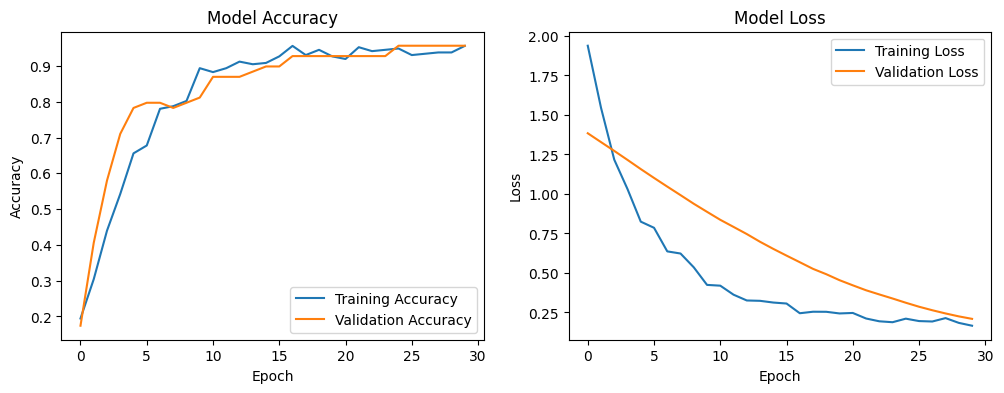

In [22]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [23]:
def predict_disease(symptoms_list):
    # Membuat vektor gejala untuk input
    input_vector = [0] * len(all_symptoms)
    valid_symptoms_found = False
    for symptom in symptoms_list:
        if symptom in all_symptoms:
            input_vector[all_symptoms.index(symptom)] = 1
            valid_symptoms_found = True

    if not valid_symptoms_found:
        print("Tidak ada gejala yang valid ditemukan dalam daftar input.")
        return None, None

    # Mengubah ke format yang sesuai untuk model (numpy array dan reshape)
    input_array = np.array([input_vector])

    # Melakukan prediksi
    prediction = model.predict(input_array)

    # Mendapatkan indeks kelas dengan probabilitas tertinggi
    predicted_class_index = np.argmax(prediction)

    # Mendapatkan nama penyakit dari LabelEncoder
    predicted_disease = le.inverse_transform([predicted_class_index])[0]

    return predicted_disease

# input dari user
user_input = input("Masukkan gejala (pisahkan dengan koma): ")
symptoms_to_predict = [sym.strip() for sym in user_input.split(",")]

predicted_disease = predict_disease(symptoms_to_predict)

if predicted_disease:
    print(f"Penyakit yang diprediksi: {predicted_disease}")


Masukkan gejala (pisahkan dengan koma): skin_rash, fatigue, lethargy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Penyakit yang diprediksi: Chicken pox


In [24]:
import joblib
# Save symptoms to JSON file
with open('skin_symptoms.json', 'w') as f:
    json.dump(all_symptoms, f, indent=4)
print("Symptoms saved to skin_symptoms.json")

# Save model
model.save("skin_disease_model.h5")
print("Model saved to skin_disease_model.h5")

# Save LabelEncoder
joblib.dump(le, "skin_label_encoder.pkl")
print("LabelEncoder saved to skin_label_encoder.pkl")

Symptoms saved to skin_symptoms.json
Model saved to skin_disease_model.h5
LabelEncoder saved to skin_label_encoder.pkl
